# Import package#

In [48]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Data#

In [142]:
data = pd.read_csv('water_potability.csv')

In [143]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [145]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


Menangani missing value pada ph

In [146]:
nun_ph = data['ph'].isna().mean()*100
print('Presentasi nilai yang hilang pada kolom ph : {:.1f}%'.format(nun_ph))

Presentasi nilai yang hilang pada kolom ph : 15.0%


<Axes: ylabel='ph'>

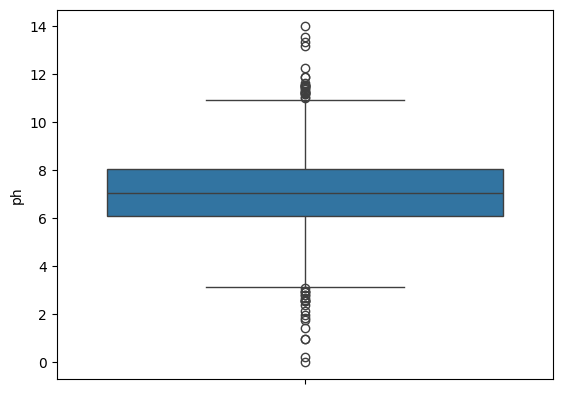

In [147]:
sns.boxplot(data=data['ph'])

In [148]:
mean_ph = data['ph'].mean()
median_ph = data['ph'].median()
print('Mean ph : {:.2f}'.format(mean_ph))
print('Median ph : {:.2f}'.format(median_ph))

Mean ph : 7.08
Median ph : 7.04


In [149]:
data['ph'] = data['ph'].fillna(data['ph'].median())

In [150]:
# Menghapus outliar ph

Q1_ph = data['ph'].quantile(0.25)
Q3_ph = data['ph'].quantile(0.75)
IQR_ph = Q3_ph - Q1_ph

lower_bound_ph = Q1_ph - 1.5 * IQR_ph
upper_bound_ph = Q3_ph + 1.5 * IQR_ph

data = data[(data['ph'] >= lower_bound_ph) & (data['ph'] <= upper_bound_ph)]

Menangani missing value pada sulfate

In [151]:
nun_sulfate = data['Sulfate'].isna().mean()*100
print('Presentasi nilai yang hilang pada kolom Sulfate : {:.1f}%'.format(nun_sulfate))

Presentasi nilai yang hilang pada kolom Sulfate : 23.7%


<Axes: ylabel='Sulfate'>

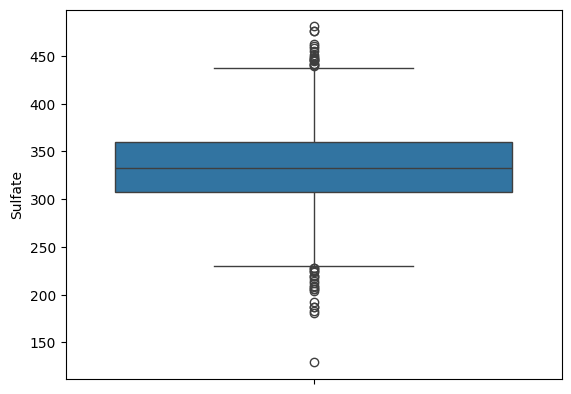

In [152]:
sns.boxplot(data=data['Sulfate'])

In [153]:
mean_sulfate = data['Sulfate'].mean()
median_sulfate = data['Sulfate'].median()
print('Mean sulfate : {:.2f}'.format(mean_sulfate))
print('Median sulfate : {:.2f}'.format(median_sulfate))

Mean sulfate : 333.69
Median sulfate : 333.12


In [154]:
data.loc[:, 'Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].median())

In [155]:
# Menghapus outliar pada Sulfate

Q1_sulfate = data['Sulfate'].quantile(0.25)
Q3_sulfate = data['Sulfate'].quantile(0.75)
IQR_sulfate = Q3_sulfate - Q1_sulfate

lower_bound_sulfate = Q1_sulfate - 1.5 * IQR_sulfate
upper_bound_sulfate = Q3_sulfate + 1.5 * IQR_sulfate

data = data[(data['Sulfate'] >= lower_bound_sulfate) & (data['Sulfate'] <= upper_bound_sulfate)]

Menangani Missing Value Trihalomethanes

In [156]:
nun_trihalomethanes = data['Trihalomethanes'].isna().mean()*100
print('Presentasi nilai yang hilang pada kolom Trihalomethanes : {:.1f}%'.format(nun_trihalomethanes))

Presentasi nilai yang hilang pada kolom Trihalomethanes : 4.8%


<Axes: ylabel='Trihalomethanes'>

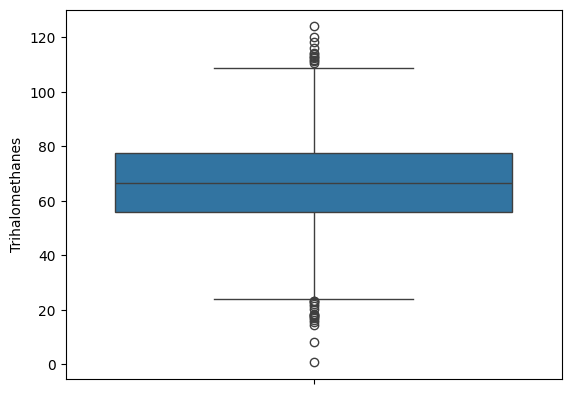

In [157]:
sns.boxplot(data=data['Trihalomethanes'])

In [158]:
mean_trihalomethanes = data['Trihalomethanes'].mean()
median_trihalomethanes = data['Trihalomethanes'].median()
print('Mean Trihalomethanes : {:.2f}'.format(mean_trihalomethanes))
print('Median Trihalomethanes : {:.2f}'.format(median_trihalomethanes))

Mean Trihalomethanes : 66.44
Median Trihalomethanes : 66.61


In [159]:
data.loc[: ,'Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

In [160]:
# Menghapus outliar pada Trihalomethanes

Q1_trihalomethanes = data['Trihalomethanes'].quantile(0.25)
Q3_trihalomethanes = data['Trihalomethanes'].quantile(0.75)
IQR_trihalomethanes = Q3_trihalomethanes - Q1_trihalomethanes

lower_bound_trihalomethanes = Q1_trihalomethanes - 1.5 * IQR_trihalomethanes
upper_bound_trihalomethanes = Q3_trihalomethanes + 1.5 * IQR_trihalomethanes

data = data[(data['Trihalomethanes'] >= lower_bound_trihalomethanes) & (data['Trihalomethanes'] <= upper_bound_trihalomethanes)]

In [161]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000
mean,7.071425,197.078371,21789.746988,7.116172,333.572023,426.275320,14.302979,66.543447,3.957156,0.379408
std,1.237298,31.126426,8375.000453,1.516075,26.588593,80.924638,3.302801,14.852810,0.781834,0.485325
min,3.902476,73.492234,320.942611,1.683993,267.202392,181.483754,4.371899,27.559355,1.450000,0.000000
25%,6.336324,178.294976,15732.309141,6.179466,319.375688,365.437205,12.066597,57.125641,3.436425,0.000000
50%,7.036752,197.509503,20777.043748,7.121018,333.119476,421.926811,14.220645,66.439235,3.939948,0.000000
75%,7.814319,216.418957,27002.973216,8.073607,347.883714,482.349100,16.576036,76.666609,4.492202,1.000000
max,10.252816,317.338124,61227.196008,12.912187,400.373526,753.342620,28.300000,107.189584,6.739000,1.000000


In [162]:
data[data.select_dtypes(include=['float64']).columns] = np.ceil(data.select_dtypes(include=['float64']))

# Mengubah tipe data menjadi integer
data = data.astype(int)

data


<ipython-input-162-87ce38fc2c4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.select_dtypes(include=['float64']).columns] = np.ceil(data.select_dtypes(include=['float64']))


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8,205,20792,8,369,565,11,87,3,0
2,9,225,19910,10,334,419,17,67,4,0
3,9,215,22019,9,357,364,19,101,5,0
4,10,182,17979,7,311,399,12,32,5,0
5,6,189,28749,8,327,281,9,55,3,0
...,...,...,...,...,...,...,...,...,...,...
3271,5,194,47581,8,360,527,14,67,5,1
3272,8,194,17330,9,334,393,20,67,3,1
3273,10,176,33156,8,334,433,12,70,4,1
3274,6,231,11984,7,334,403,12,78,5,1


In [163]:
data.Potability.value_counts()

,count
Potability,
0,1760
1,1076


In [164]:
data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# EDA

In [113]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8,205,20792,8,369,565,11,87,3,0
2,9,225,19910,10,334,419,17,67,4,0
3,9,215,22019,9,357,364,19,101,5,0
4,10,182,17979,7,311,399,12,32,5,0
5,6,189,28749,8,327,281,9,55,3,0
...,...,...,...,...,...,...,...,...,...,...
3271,5,194,47581,8,360,527,14,67,5,1
3272,8,194,17330,9,334,393,20,67,3,1
3273,10,176,33156,8,334,433,12,70,4,1
3274,6,231,11984,7,334,403,12,78,5,1


<Axes: >

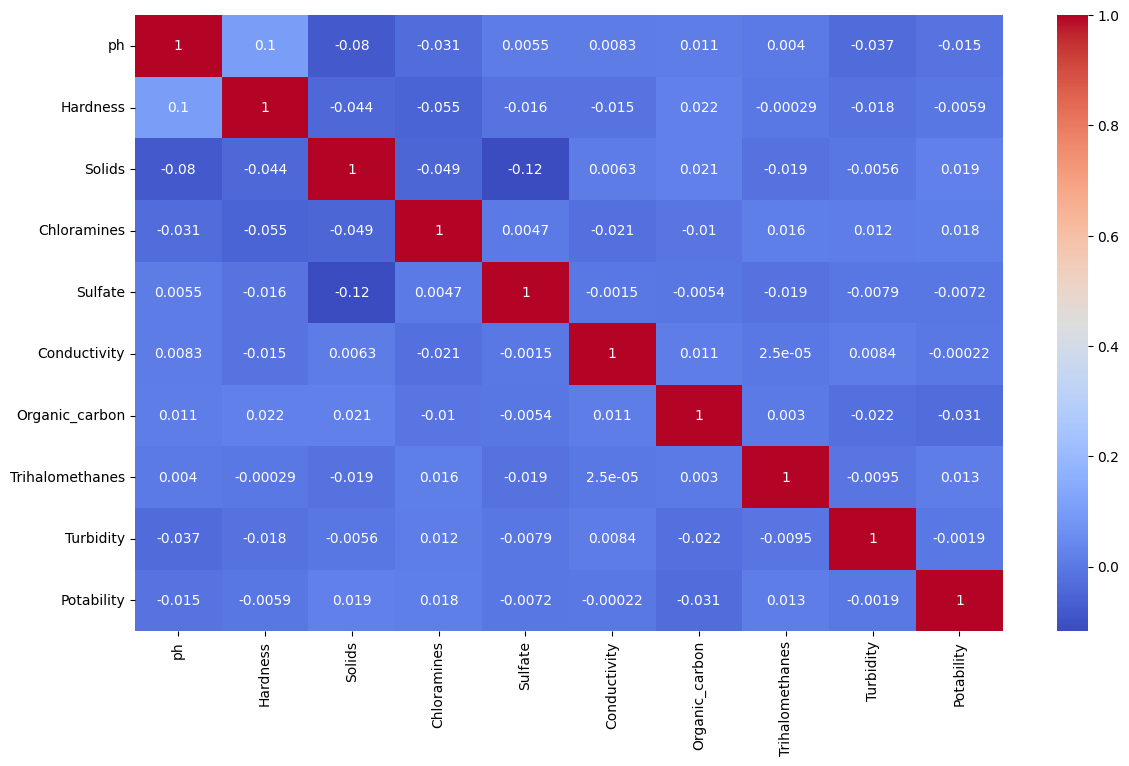

In [114]:
from matplotlib import pyplot as plt
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [115]:
features_to_drop = ['Conductivity']
data= data.drop(columns=features_to_drop)

In [ ]:
# prompt: download dataset hasil preprocessing

# Save the preprocessed data to a CSV file
data.to_csv('preprocessed_water_potability.csv', index=False)

# Download the file
from google.colab import files
files.download('preprocessed_water_potability.csv')


# Pengembangan Model Decision Tree

Decision Tree

In [116]:
data1 = data.copy()

In [117]:
x = data1.drop('Potability', axis=1)
y = data1['Potability']

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

X_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [119]:
print('X_train shape :', X_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (2268, 8)
x_test shape : (568, 8)
y_train shape : (2268,)
y_test shape : (568,)


In [120]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

#oversampling menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(x_scaled, y)

#cek jumalh smpel setelah oversampling
print('Jumlah sampel sebelum oversampling:', len(x_scaled))
print('Jumlah sampel setelah oversampling:', len(X_resampled))

#balikan ke dalam DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=x.columns), pd.DataFrame(y_resampled, columns=['Potability'])], axis=1)
resampled_data.to_csv('water_potability_resampled.csv', index=False) # Corrected function name to to_csv

Jumlah sampel sebelum oversampling: 2836
Jumlah sampel setelah oversampling: 3520


In [121]:
data = pd.read_csv('water_potability_resampled.csv')

In [122]:
data['Potability'].value_counts()

,count
Potability,
0,1760
1,1760


In [123]:
data_scaled = pd.DataFrame(x_scaled)
data_scaled.to_csv("x_scaled.csv", index=False)

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth' : np.arange(1,30)}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5,)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 5}

In [133]:
from sklearn.metrics import accuracy_score, classification_report

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(x_test)
decision_tree_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, zero_division=0))
print("Accuracy:{:.2f}%".format(decision_tree_acc * 100))


              precision    recall  f1-score   support

           0       0.70      0.89      0.78       371
           1       0.58      0.29      0.39       197

    accuracy                           0.68       568
   macro avg       0.64      0.59      0.59       568
weighted avg       0.66      0.68      0.65       568

Accuracy:68.13%


Confusion Matrix:
[[315  56]
 [143  54]]


Text(0.5, 1.0, 'Confus')

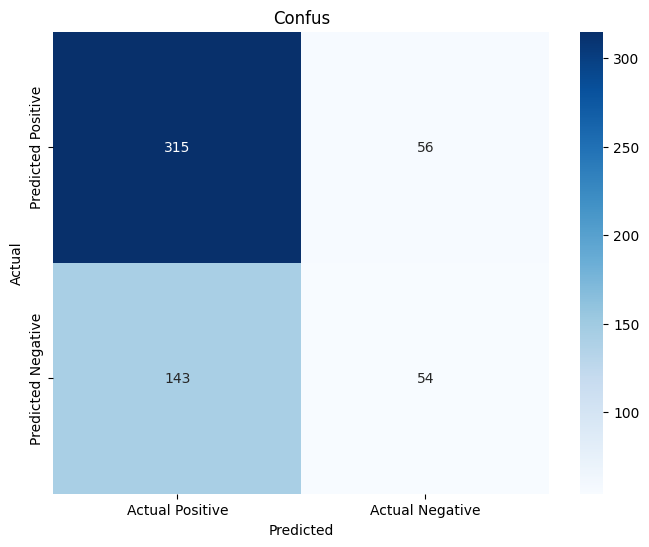

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[ 'Actual Positive', 'Actual Negative' ], yticklabels=[ 'Predicted Positive', 'Predicted Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confus')

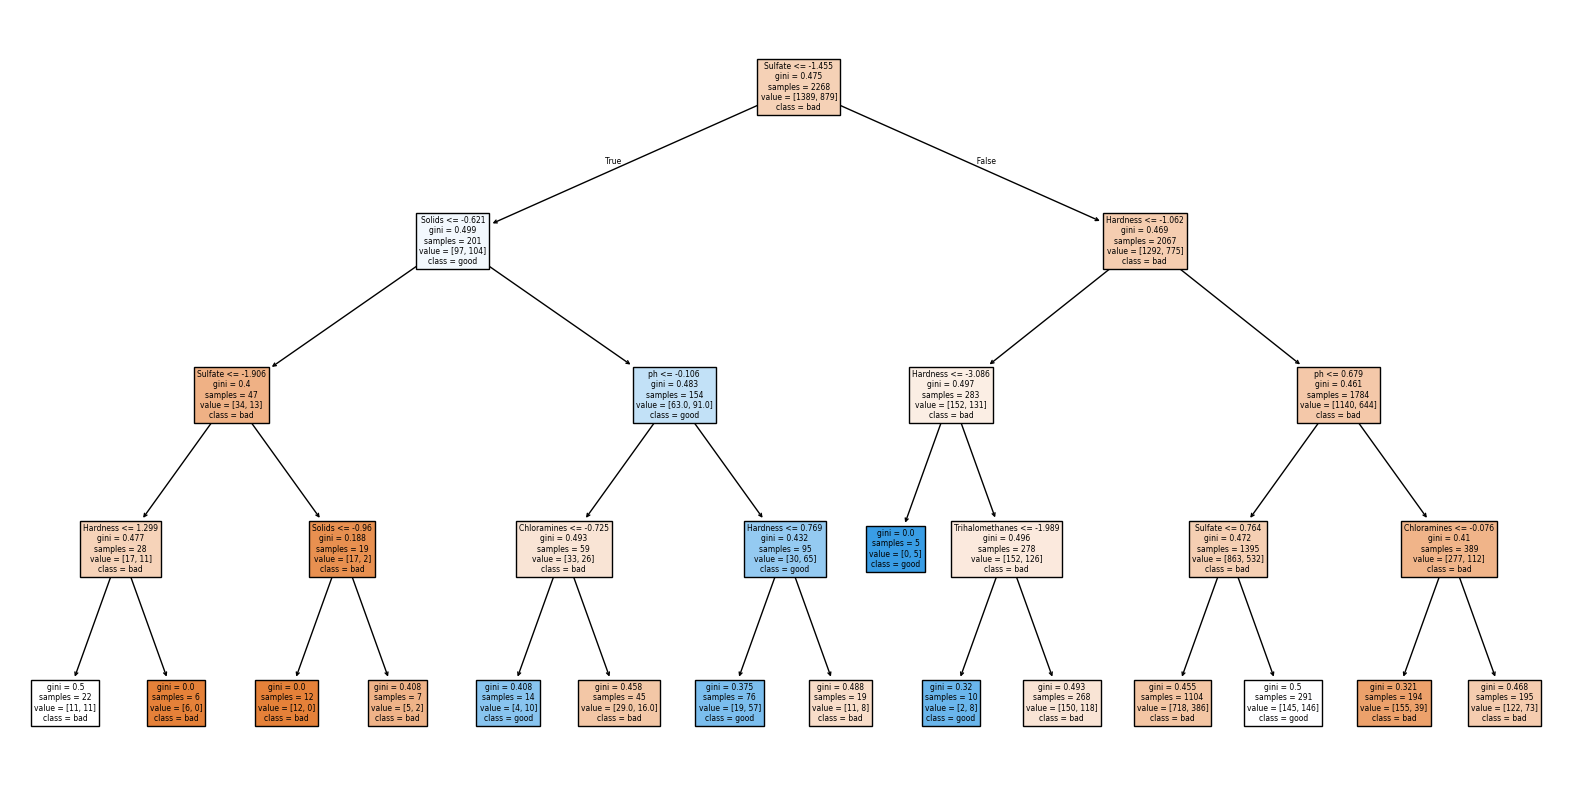

In [127]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=x.columns, class_names=['bad', 'good'], filled=True)
plt.show()

In [128]:
import pickle

filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Pengembangan Model SVM

In [134]:
data2 = data.copy()

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

x = data2.drop('Potability', axis=1)
y = data2['Potability']

In [136]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [138]:
clf = SVC(kernel='linear', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("SVM accuracy : {:.2f}%".format(CLF_accuracy*100))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57       362
           1       0.50      0.41      0.45       342

    accuracy                           0.52       704
   macro avg       0.51      0.51      0.51       704
weighted avg       0.52      0.52      0.51       704

SVM accuracy : 51.70%


In [139]:
# Assuming X_train, X_test, y_train, y_test are defined from previous code

clf = SVC(kernel='poly', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("SVM accuracy : {:.2f}%".format(CLF_accuracy*100))


              precision    recall  f1-score   support

           0       0.58      0.50      0.54       362
           1       0.54      0.61      0.57       342

    accuracy                           0.55       704
   macro avg       0.56      0.56      0.55       704
weighted avg       0.56      0.55      0.55       704

SVM accuracy : 55.40%


In [140]:
# Assuming X_train, X_test, y_train, y_test are defined from previous code

clf = SVC(kernel='rbf', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("SVM accuracy : {:.2f}%".format(CLF_accuracy*100))


              precision    recall  f1-score   support

           0       0.66      0.60      0.63       362
           1       0.61      0.67      0.64       342

    accuracy                           0.63       704
   macro avg       0.63      0.63      0.63       704
weighted avg       0.63      0.63      0.63       704

SVM accuracy : 63.21%


Confusion Matrix:
[[217 145]
 [114 228]]


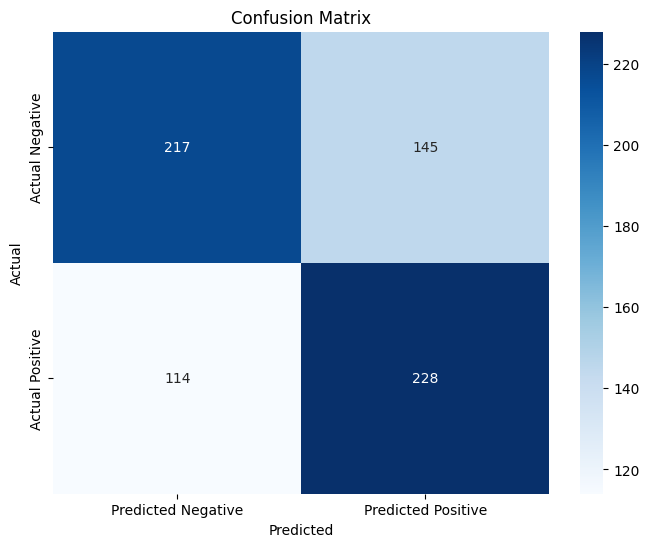

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
